# Hands-On Pertemuan 9: Spark SQL

## Tujuan:
- Mengasah keterampilan analisis data menggunakan Spark SQL.
- Melakukan lebih banyak latihan SQL yang mengarah ke skenario dunia nyata.
- Mempersiapkan mahasiswa untuk menggunakan Spark SQL dalam proyek besar.


In [2]:
!pip install pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Pertemuan9") \
    .getOrCreate()


### 1. Refresher: Basic SQL Operations in Spark SQL
- **Tugas 1**: Ulangi pemahaman Anda tentang SQL dasar dengan menjalankan queries sederhana pada dataset di Spark SQL.


In [ ]:
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()


+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



### 2. Advanced Queries for Data Analysis
Gunakan queries lebih kompleks, melibatkan grouping, filtering, dan subqueries.
- **Tugas 2**: Buat SQL query yang menghitung total gaji berdasarkan jenis kelamin dan usia.


In [ ]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



- **Tugas Tambahan 2**:
1. Cari rata-rata gaji per departemen.
2. Temukan karyawan yang memiliki gaji di atas rata-rata untuk gender masing-masing.
3. Buat ranking karyawan berdasarkan gaji dalam departemen mereka.


In [ ]:
spark.sql('SELECT DeptId, AVG(Salary) FROM employees GROUP BY DeptId').show()

spark.sql('''
SELECT Name, Age, Gender, Salary
FROM employees e
WHERE Salary > (
    SELECT AVG(Salary)
    FROM employees
    WHERE Gender = e.Gender
    )
''').show()

spark.sql('''
SELECT Name, Age, Gender, Salary, DeptId,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) as RANK
FROM employees
''').show()


+------+-----------+
|DeptId|avg(Salary)|
+------+-----------+
|     1|     2850.0|
|     2|     4100.0|
+------+-----------+

+-----+---+------+------+
| Name|Age|Gender|Salary|
+-----+---+------+------+
|James| 34|     M|  3000|
+-----+---+------+------+

+-----+---+------+------+------+----+
| Name|Age|Gender|Salary|DeptId|RANK|
+-----+---+------+------+------+----+
|James| 34|     M|  3000|     1|   1|
|  Lee| 23|     M|  2700|     1|   2|
| Anna| 28|     F|  4100|     2|   1|
+-----+---+------+------+------+----+



### 3. Penggunaan Window Functions dan Subqueries
Latihan penggunaan window functions untuk menemukan karyawan dengan gaji tertinggi dan urutannya berdasarkan kelompok usia.
- **Tugas 3**: Terapkan window functions untuk menemukan top 3 karyawan dalam kelompok usia tertentu.


In [ ]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()


+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



### 4. Advanced Spark SQL Queries
Menjelajahi queries yang lebih kompleks yang melibatkan multiple joins, subqueries, dan window functions.
- **Tugas 4**: Demonstrasi penggunaan multi-level joins dan subqueries untuk analisis data yang mendalam.


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



Latihan mandiri untuk memperkuat pemahaman tentang Spark SQL dalam analisis data terdistribusi.
- **Tugas 5**: Tuliskan query SQL untuk menemukan rata-rata gaji per departemen dan rangking setiap karyawan dalam departemen berdasarkan gaji.
- **Tugas 6**: Gunakan window functions untuk menentukan tren gaji berdasarkan usia di setiap departemen.


In [ ]:
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, AVG(e.Salary) OVER (PARTITION BY d.DeptName) as AverageSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

spark.sql('''
SELECT e.Name, e.Age, d.DeptName, ROW_NUMBER() OVER (PARTITION BY d.DeptName ORDER BY e.Salary DESC) as rank
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
''').show()

+-----+---+---------+-------------+
| Name|Age| DeptName|AverageSalary|
+-----+---+---------+-------------+
|James| 34|       HR|       2850.0|
|  Lee| 23|       HR|       2850.0|
| Anna| 28|Marketing|       4100.0|
+-----+---+---------+-------------+

+-----+---+---------+----+
| Name|Age| DeptName|rank|
+-----+---+---------+----+
|James| 34|       HR|   1|
|  Lee| 23|       HR|   2|
| Anna| 28|Marketing|   1|
+-----+---+---------+----+



### 5. Advanced Data Analysis and Visualization
Penerapan teknik analisis data yang lebih canggih dan visualisasi menggunakan PySpark dan matplotlib.
- **Tugas 7**: Lakukan analisis tren gaji menggunakan Spark SQL dan visualisasikan hasilnya.


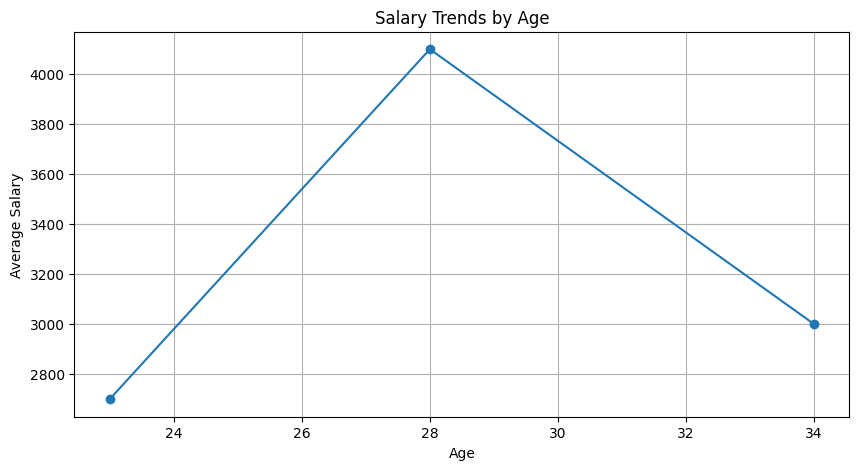

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


### 6. Homework
- **Tugas 1**: Gunakan Spark SQL untuk mencari total gaji dan jumlah karyawan per departemen. Buat visualisasi perbandingan antar departemen.
- **Tugas 2**: Temukan karyawan dengan gaji di atas rata-rata dalam setiap kelompok usia dan visualisasikan data ini dalam bentuk grafik batang atau pie chart.
- **Tugas 3**: Buat dataset yang lebih besar (misalnya, 100+ baris) dan lakukan analisis mendalam menggunakan SQL functions seperti `SUM()`, `AVG()`, `COUNT()`, serta `JOIN` antar tabel.


Tugas 1

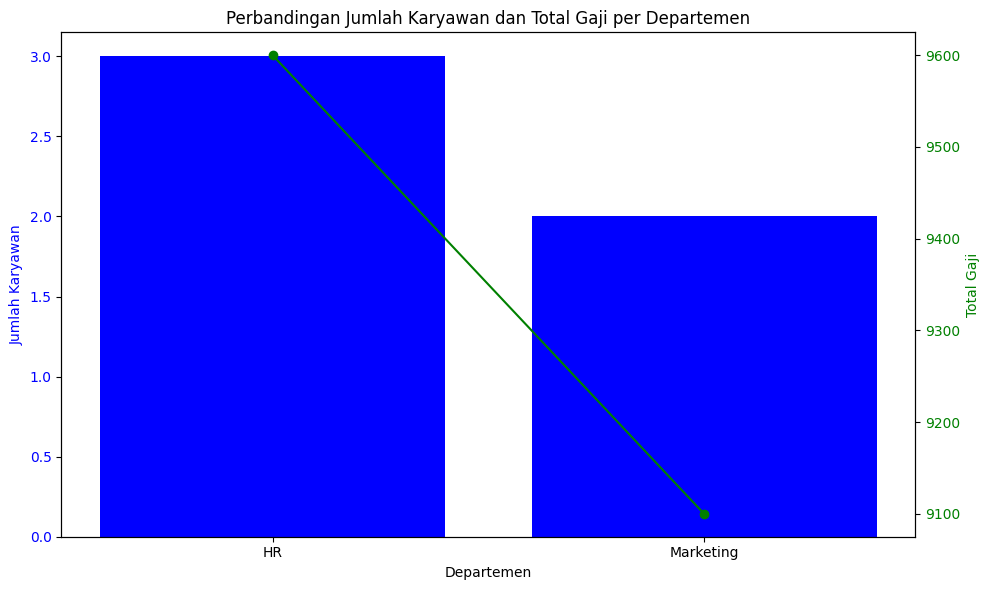

In [14]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Buat SparkSession
spark = SparkSession.builder.appName('TotalSalaryPerDepartment').getOrCreate()


# Buat tabel sementara
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')

# SQL Query untuk mencari total gaji dan jumlah karyawan per departemen
salary_count_by_department = spark.sql("""
    SELECT d.DeptName, COUNT(e.Name) AS EmployeeCount, SUM(e.Salary) AS TotalSalary
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
""")

# Konversi hasil query ke Pandas DataFrame untuk visualisasi
pandas_df = salary_count_by_department.toPandas()

# Visualisasi perbandingan jumlah karyawan dan total gaji antar departemen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot bar untuk jumlah karyawan
ax1.bar(pandas_df['DeptName'], pandas_df['EmployeeCount'], color='blue', label='Jumlah Karyawan')
ax1.set_xlabel('Departemen')
ax1.set_ylabel('Jumlah Karyawan', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Buat sumbu kedua untuk total gaji
ax2 = ax1.twinx()
ax2.plot(pandas_df['DeptName'], pandas_df['TotalSalary'], color='green', marker='o', label='Total Gaji')
ax2.set_ylabel('Total Gaji', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Tambahkan judul
plt.title('Perbandingan Jumlah Karyawan dan Total Gaji per Departemen')

# Menampilkan grafik
fig.tight_layout()
plt.show()


Tugas 2

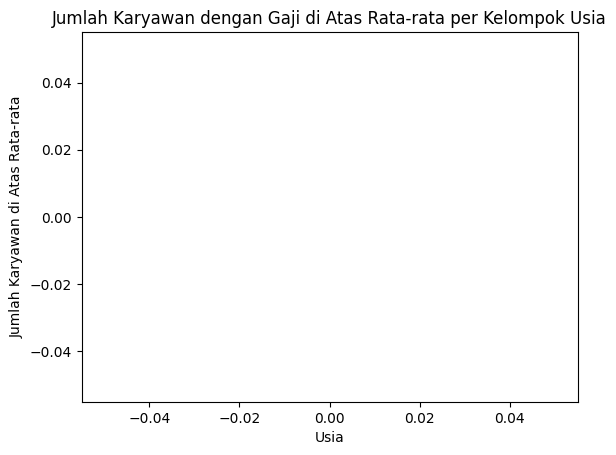

In [15]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt

# Buat SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Register DataFrame sebagai view SQL
employees.createOrReplaceTempView('employees')

# Query untuk mencari karyawan dengan gaji di atas rata-rata per kelompok usia
average_salary_by_age = spark.sql("""
    SELECT Age, AVG(Salary) as AvgSalary
    FROM employees
    GROUP BY Age
""")

average_salary_by_age.createOrReplaceTempView('average_salary_by_age')

# Gabungkan untuk menemukan karyawan dengan gaji di atas rata-rata di kelompok usia mereka
above_average_employees = spark.sql("""
    SELECT e.Age, e.Name, e.Salary
    FROM employees e
    JOIN average_salary_by_age avg ON e.Age = avg.Age
    WHERE e.Salary > avg.AvgSalary
""")

# Konversi ke Pandas DataFrame untuk visualisasi
pandas_df = above_average_employees.toPandas()

# Hitung jumlah karyawan di atas rata-rata per kelompok usia
counts = pandas_df.groupby('Age').size()

# Buat grafik batang
plt.bar(counts.index, counts.values)
plt.xlabel('Usia')
plt.ylabel('Jumlah Karyawan di Atas Rata-rata')
plt.title('Jumlah Karyawan dengan Gaji di Atas Rata-rata per Kelompok Usia')
plt.show()


Tugas 3

In [21]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi SparkSession
spark = SparkSession.builder.appName('ManualDatasetAnalysis').getOrCreate()

# Data Setup
# Departemen
departments_data = [
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'Engineering'),
    (4, 'Sales'),
    (5, 'Finance')
]
departments = spark.createDataFrame(departments_data, ['DeptId', 'DeptName'])

# Karyawan (110 data)
employees_data = [
    ('Joko', 30, 'M', 6000, 1),
    ('Siti', 28, 'F', 6500, 2),
    ('Yanto', 35, 'M', 7000, 3),
    ('Ayu', 26, 'F', 5500, 1),
    ('Budi', 40, 'M', 9000, 4),
    ('Sari', 32, 'F', 7500, 2),
    ('Joni', 45, 'M', 8000, 5),
    ('Sofi', 27, 'F', 7200, 3),
    ('Pulung', 38, 'M', 7800, 4),
    ('Ela', 29, 'F', 6800, 5),
    ('Saman', 33, 'M', 6200, 1),
    ('Karina', 31, 'F', 5900, 2),
    ('Tomi', 36, 'M', 6400, 3),
    ('Rina', 25, 'F', 5600, 4),
    ('Yoko', 41, 'M', 8200, 5),
    ('Lisa', 34, 'F', 7000, 1),
    ('Junaedi', 39, 'M', 7100, 2),
    ('Mayang', 27, 'F', 5900, 3),
    ('Lukman', 30, 'M', 6000, 4),
    ('Eli', 28, 'F', 7200, 5),
    ('Rafi', 37, 'M', 7500, 1),
    ('Zahra', 29, 'F', 6800, 2),
    ('Dedi', 34, 'M', 7900, 3),
    ('Klara', 36, 'F', 7000, 4),
    ('Pur', 42, 'M', 8500, 5),
    ('Salisa', 25, 'F', 5700, 1),
    ('Mat', 33, 'M', 6300, 2),
    ('Julia', 30, 'F', 6500, 3),
    ('Rido', 35, 'M', 7200, 4),
    ('Naura', 40, 'F', 7800, 5),
    ('Ferdi', 29, 'M', 6100, 1),
    ('Oliv', 31, 'F', 5400, 2),
    ('Beni', 38, 'M', 6600, 3),
    ('Kirana', 27, 'F', 5800, 4),
    ('Timoty', 39, 'M', 7300, 5),
    ('Gita', 26, 'F', 5900, 1),
    ('Febri', 34, 'M', 6000, 2),
    ('Desi', 30, 'F', 6200, 3),
    ('Kevin', 42, 'M', 8300, 4),
    ('Eva', 36, 'F', 7100, 5),
    ('Toko', 33, 'M', 5900, 1),
    ('Ami', 30, 'F', 5700, 2),
    ('Gofar', 41, 'M', 8500, 3),
    ('Meli', 25, 'F', 5300, 4),
    ('Viki', 39, 'M', 7400, 5),
    ('Jesika', 34, 'F', 6000, 1),
    ('Mamat', 38, 'M', 6600, 2),
    ('Anjani', 32, 'F', 7200, 3),
    ('Kolis', 27, 'M', 5900, 4),
    ('Kayla', 31, 'F', 6800, 5),
    ('Juki', 36, 'M', 7300, 1),
    ('Mega', 29, 'F', 6400, 2),
    ('Luki', 34, 'M', 7000, 3),
    ('Freya', 25, 'F', 5500, 4),
    ('Dodo', 39, 'M', 7800, 5),
    ('Soya', 36, 'F', 7200, 1),
    ('Adam', 30, 'M', 6200, 2),
    ('Elita', 27, 'F', 6000, 3),
    ('Coki', 35, 'M', 6600, 4),
    ('Mey', 32, 'F', 7000, 5),
    ('Sigit', 28, 'M', 5900, 1),
    ('Clara', 29, 'F', 5700, 2),
    ('Oman', 40, 'M', 8500, 3),
    ('Lily', 36, 'F', 7200, 4),
    ('Gumilang', 42, 'M', 8300, 5),
    ('Jupri', 33, 'M', 6700, 1),
    ('Cica', 28, 'F', 5800, 2),
    ('Ryan', 38, 'M', 7100, 3),
    ('Rika', 30, 'F', 5400, 4),
    ('Viko', 34, 'M', 6200, 5),
    ('Arumi', 25, 'F', 5600, 1),
    ('Erik', 32, 'M', 6600, 2),
    ('Soli', 40, 'F', 7900, 3),
    ('Kambuya', 36, 'M', 8300, 4),
    ('Tina', 29, 'F', 6500, 5),
    ('Justin', 31, 'M', 6000, 1),
    ('Mila', 34, 'F', 6700, 2),
    ('Arndy', 27, 'M', 6200, 3),
    ('Gressel', 38, 'F', 7100, 4),
    ('Billy', 35, 'M', 6800, 5),
    ('Elsa', 30, 'F', 6400, 1),
    ('Hery', 29, 'M', 6100, 2),
    ('Luna', 32, 'F', 6800, 3),
    ('Agil', 42, 'M', 8500, 4),
    ('Tedi', 36, 'M', 7200, 5),
]

# Buat DataFrame karyawan
employees = spark.createDataFrame(employees_data, ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

# Buat tabel sementara
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')

# Analisis SQL
# 1. Total Gaji dan Jumlah Karyawan per Departemen
salary_count_by_department = spark.sql("""
    SELECT d.DeptName, COUNT(e.Name) AS EmployeeCount, SUM(e.Salary) AS TotalSalary
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
    ORDER BY TotalSalary DESC
""")
salary_count_by_department.show()

# 2. Rata-rata Gaji dan Umur per Departemen
avg_salary_age_by_department = spark.sql("""
    SELECT d.DeptName, AVG(e.Salary) AS AvgSalary, AVG(e.Age) AS AvgAge
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName
    ORDER BY AvgSalary DESC
""")
avg_salary_age_by_department.show()

# 3. Jumlah Karyawan Berdasarkan Gender per Departemen
gender_count_by_department = spark.sql("""
    SELECT d.DeptName, e.Gender, COUNT(e.Name) AS EmployeeCount
    FROM employees e
    JOIN departments d ON e.DeptId = d.DeptId
    GROUP BY d.DeptName, e.Gender
    ORDER BY d.DeptName, EmployeeCount DESC
""")
gender_count_by_department.show()


+-----------+-------------+-----------+
|   DeptName|EmployeeCount|TotalSalary|
+-----------+-------------+-----------+
|    Finance|           17|     124900|
|Engineering|           17|     118900|
|      Sales|           17|     116500|
|  Marketing|           17|     107300|
|         HR|           17|     106900|
+-----------+-------------+-----------+

+-----------+-----------------+------------------+
|   DeptName|        AvgSalary|            AvgAge|
+-----------+-----------------+------------------+
|    Finance|7347.058823529412|36.294117647058826|
|Engineering|6994.117647058823|33.411764705882355|
|      Sales|6852.941176470588| 33.35294117647059|
|  Marketing|6311.764705882353|31.529411764705884|
|         HR|6288.235294117647|30.941176470588236|
+-----------+-----------------+------------------+

+-----------+------+-------------+
|   DeptName|Gender|EmployeeCount|
+-----------+------+-------------+
|Engineering|     M|            9|
|Engineering|     F|            8|
|   